In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/energy_efficiency.csv'

data = pd.read_csv(file_path)

print(data.head())

   relative_compactness  surface_area  wall_area  roof_area  overall_height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   orientation  glazing_area  glazing_area_distribution  heating_load  \
0          2.0           0.0                        0.0         15.55   
1          3.0           0.0                        0.0         15.55   
2          4.0           0.0                        0.0         15.55   
3          5.0           0.0                        0.0         15.55   
4          2.0           0.0                        0.0         20.84   

   cooling_load  
0         21.33  
1         21.33  
2         21.33  
3         21.3

In [ ]:
data.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
data.nunique()

relative_compactness          12
surface_area                  12
wall_area                      7
roof_area                      4
overall_height                 2
orientation                    4
glazing_area                   4
glazing_area_distribution      6
heating_load                 587
cooling_load                 636
dtype: int64

The surface area of the dataset has only 12 unique values, this means that there are only 12 different building shape. All of these 12 building shapes can have any of the 7 Wall Area and 4 Roof Area amongst other properties. Different combination of these unique variables gave rise to the 768 examples.

In [ ]:
pip install memory_profiler

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['heating_load'], axis=1)
y_heating = data['heating_load']

# Splitting the data into train and test sets
X_train, _, y_train, _ = train_test_split(X, y_heating, test_size=0.2, random_state=42)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression


# Calculate mutual information between numerical features and heating load
mutual_info_heating = mutual_info_regression(X, y_heating)

# Create a DataFrame to store mutual information scores
mutual_info_df = pd.DataFrame({'Feature': X.columns,
                               'Mutual_Info_Heating': mutual_info_heating})

# Sort features based on mutual information score for heating load
mutual_info_df.sort_values(by='Mutual_Info_Heating', ascending=False, inplace=True)
print("\nFeatures affecting Heating Load the most:")
print(mutual_info_df)



Features affecting Heating Load the most:
                     Feature  Mutual_Info_Heating
8               cooling_load             2.269029
1               surface_area             1.728611
0       relative_compactness             1.727963
2                  wall_area             1.109975
3                  roof_area             0.934472
6               glazing_area             0.706859
4             overall_height             0.660933
7  glazing_area_distribution             0.217929
5                orientation             0.000000


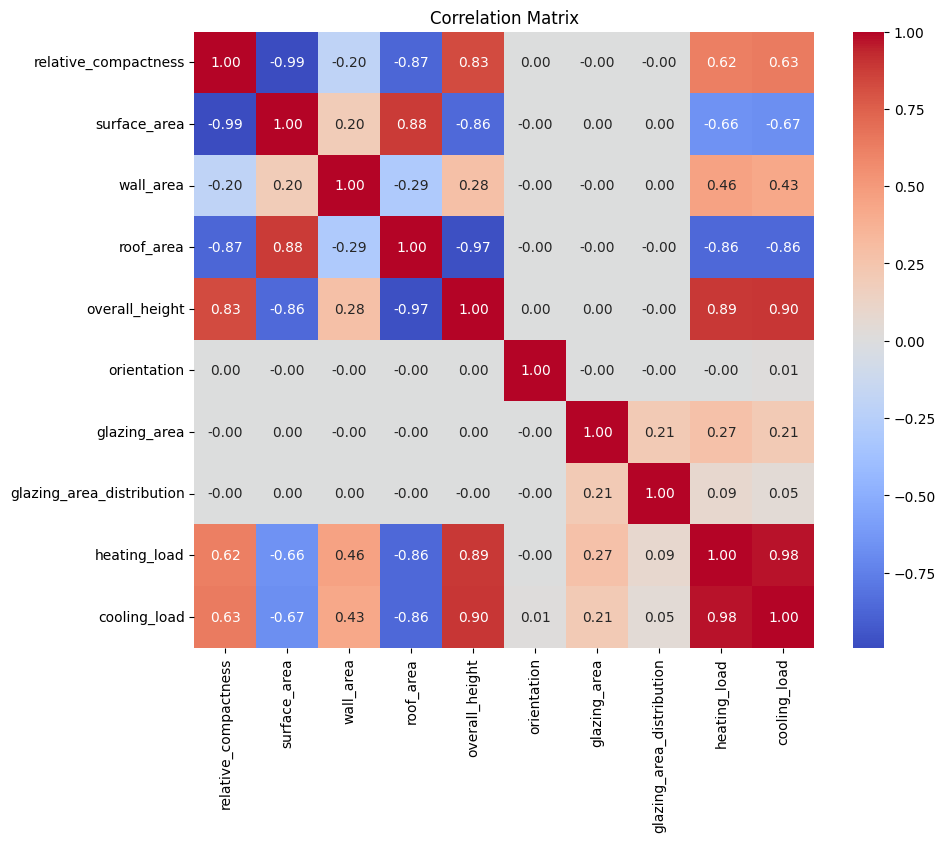

<ipython-input-38-59f645952793>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual_Info_Heating', y='Feature', data=mutual_info_df, palette='viridis')


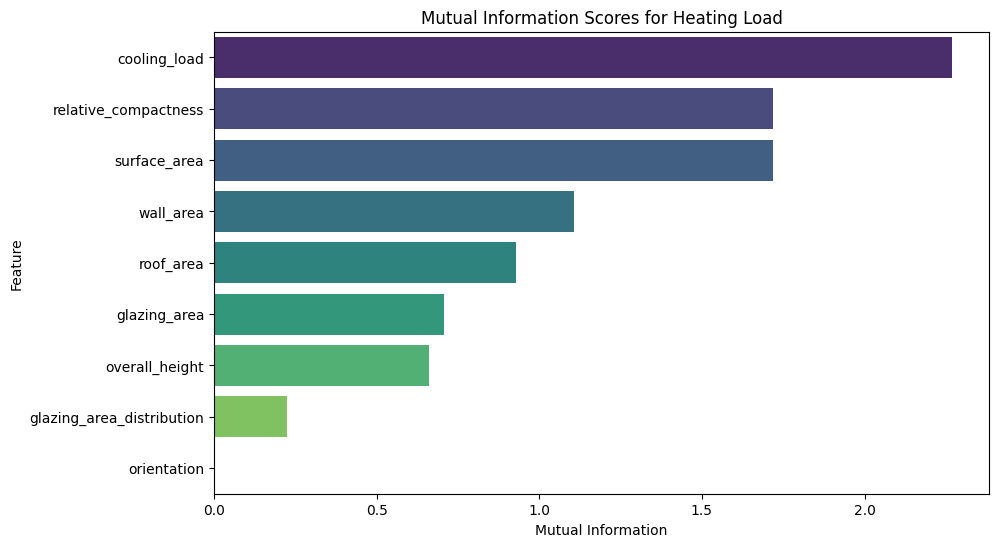

In [ ]:
#relations between features and the target variable
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression


correlation_matrix = data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

mutual_info_heating = mutual_info_regression(X, y_heating)

mutual_info_df = pd.DataFrame({'Feature': X.columns,
                               'Mutual_Info_Heating': mutual_info_heating})

mutual_info_df.sort_values(by='Mutual_Info_Heating', ascending=False, inplace=True)

# Plot mutual information scores for heating load
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual_Info_Heating', y='Feature', data=mutual_info_df, palette='viridis')
plt.title("Mutual Information Scores for Heating Load")
plt.xlabel("Mutual Information")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Milestone -1

import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time
import psutil
import os
import numpy as np

def evaluate_performance(model, X_train, y_train):
    preds = model.predict(X_train)
    mse = mean_squared_error(y_train, preds)
    rmse = np.sqrt(mse)
    return rmse

def evaluate_resource_utilization(start_time, process):
    memory_used = process.memory_info().rss / 1024 ** 2 # Memory usage in MB
    training_time = time.time() - start_time
    return memory_used, training_time

def train_and_evaluate_model(model, X, y):
    start_time = time.time()
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = []  # Store RMSE values for each fold
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        mse = mean_squared_error(y_test, preds)
        rmse = np.sqrt(mse)
        rmse_scores.append(rmse)
    memory_used, training_time = evaluate_resource_utilization(start_time, psutil.Process(os.getpid()))
    mean_rmse = np.mean(rmse_scores)
    return mean_rmse, memory_used, training_time

if __name__ == "__main__":

    # Splitting the data into features and target variables
    X = data.drop(['heating_load'], axis=1)
    y_heating = data['heating_load']

    # Lasso Regression for Heating Load
    print("\nHeating Load - Lasso Regression:")
    lasso_heating = Lasso()
    rmse_lasso_heating, memory_lasso_heating, time_lasso_heating = train_and_evaluate_model(lasso_heating, X, y_heating)
    print("Mean RMSE for 5-fold cross-validation:", rmse_lasso_heating)
    print("Memory Used (MB):", memory_lasso_heating)
    print("Training Time:", time_lasso_heating)

    # Linear Regression for Heating Load
    print("\nHeating Load - Linear Regression:")
    lr_heating = LinearRegression()
    rmse_lr_heating, memory_lr_heating, time_lr_heating = train_and_evaluate_model(lr_heating, X, y_heating)
    print("Mean RMSE for 5-fold cross-validation:", rmse_lr_heating)
    print("Memory Used (MB):", memory_lr_heating)
    print("Training Time:", time_lr_heating)




Heating Load - Lasso Regression:
Mean RMSE for 5-fold cross-validation: 2.1182888456580415
Memory Used (MB): 246.50390625
Training Time: 0.135270357131958

Heating Load - Linear Regression:
Mean RMSE for 5-fold cross-validation: 1.7875681287384921
Memory Used (MB): 246.50390625
Training Time: 0.09532666206359863


In [ ]:
# Milestone-2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import time
import psutil
import os

def evaluate_performance(model, X_valid, y_valid):
    preds = model.predict(X_valid)
    mse = mean_squared_error(y_valid, preds)
    return mse

def evaluate_resource_utilization(start_time, process):
    memory_used = process.memory_info().rss / 1024 ** 2  # Memory usage in MB
    training_time = time.time() - start_time
    return memory_used, training_time

def train_and_evaluate_model(model, X_train, y_train, X_valid, y_valid):
    start_time = time.time()
    model.fit(X_train, y_train)
    memory_used, training_time = evaluate_resource_utilization(start_time, psutil.Process(os.getpid()))
    mse = evaluate_performance(model, X_valid, y_valid)
    return mse, memory_used, training_time

if __name__ == "__main__":
    X = data.drop(['heating_load'], axis=1)
    y_heating = data['heating_load']

    # Splitting the data into training and validation sets
    train_ratio = 0.8
    split_index = int(len(X) * train_ratio)
    X_train, X_valid = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_valid = y_heating.iloc[:split_index], y_heating.iloc[split_index:]

    # Linear Regression for Heating Load
    print("\nHeating Load - Linear Regression:")
    lr_heating = LinearRegression()
    mse_lr_heating, memory_lr_heating, time_lr_heating = train_and_evaluate_model(lr_heating, X_train, y_train, X_valid, y_valid)
    print("MSE:", mse_lr_heating)
    print("Memory Used (MB):", memory_lr_heating)
    print("Training Time :", time_lr_heating)

    # Lasso Regression for Heating Load
    print("\nHeating Load - Lasso Regression:")
    lasso_heating = Lasso()
    mse_lasso_heating, memory_lasso_heating, time_lasso_heating = train_and_evaluate_model(lasso_heating, X_train, y_train, X_valid, y_valid)
    print("MSE:", mse_lasso_heating)
    print("Memory Used (MB):", memory_lasso_heating)
    print("Training Time:", time_lasso_heating)

    # Decision Tree Regression for Heating Load
    print("\nHeating Load - Decision Tree Regression:")
    dt_heating = DecisionTreeRegressor()
    mse_dt_heating, memory_dt_heating, time_dt_heating = train_and_evaluate_model(dt_heating, X_train, y_train, X_valid, y_valid)
    print("MSE:", mse_dt_heating)
    print("Memory Used (MB):", memory_dt_heating)
    print("Training Time:", time_dt_heating)

    # K-Nearest Neighbors Regression for Heating Load
    print("\nHeating Load - K-Nearest Neighbors Regression:")
    knn_heating = KNeighborsRegressor()
    mse_knn_heating, memory_knn_heating, time_knn_heating = train_and_evaluate_model(knn_heating, X_train, y_train, X_valid, y_valid)
    print("MSE:", mse_knn_heating)
    print("Memory Used (MB):", memory_knn_heating)
    print("Training Time:", time_knn_heating)



Heating Load - Linear Regression:
MSE: 3.2699666243132874
Memory Used (MB): 246.50390625
Training Time : 0.0046312808990478516

Heating Load - Lasso Regression:
MSE: 4.9244516665659015
Memory Used (MB): 246.50390625
Training Time: 0.0034918785095214844

Heating Load - Decision Tree Regression:
MSE: 2.2580824675324673
Memory Used (MB): 246.50390625
Training Time: 0.006226778030395508

Heating Load - K-Nearest Neighbors Regression:
MSE: 6.0814327012986995
Memory Used (MB): 246.50390625
Training Time: 0.003368854522705078


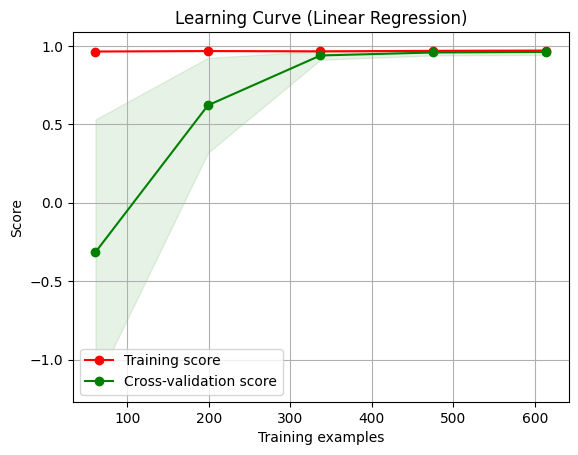

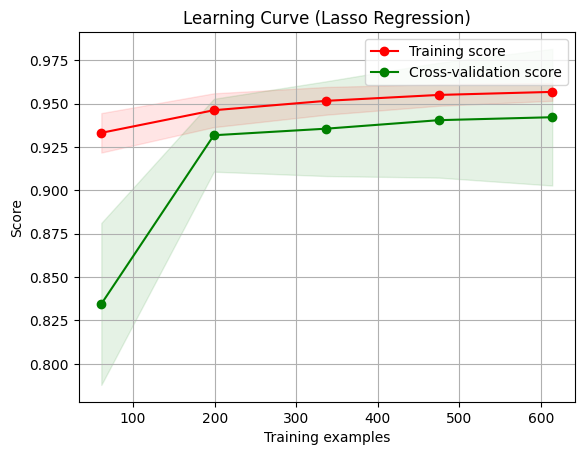

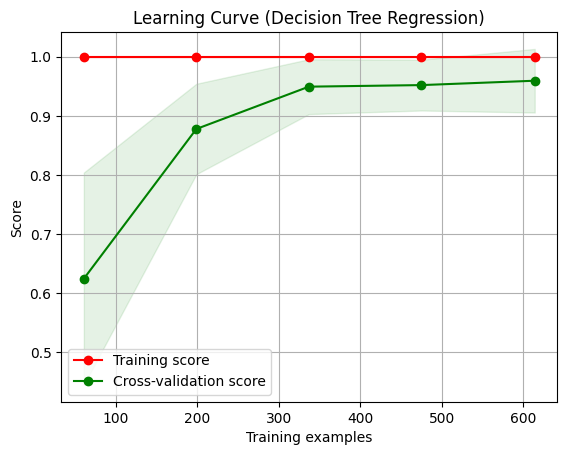

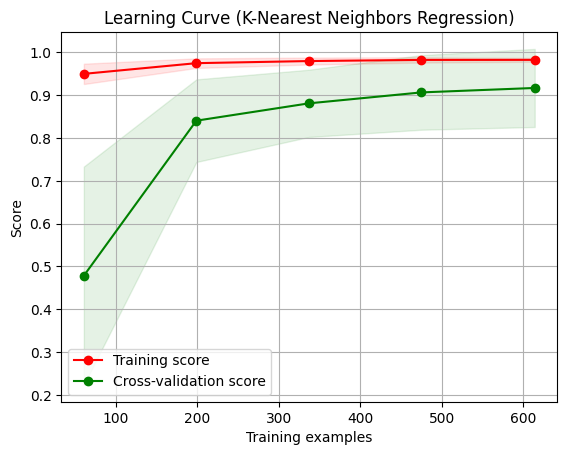

In [ ]:
#checking overfitting/underfitting for the models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Define models
models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree Regression", DecisionTreeRegressor()),
    ("K-Nearest Neighbors Regression", KNeighborsRegressor())
]

# Loop through each model
for name, model in models:
    plot_learning_curve(model, f"Learning Curve ({name})", X, y_heating, cv=5)

plt.show()


all the models seem to be performing well on unseen data as well as training data as the scores are quit similar after certain training examles.
It still shows overfitting with intial unseen data examples.

Overfitting for knn and lasso. Balanced for decision tree and linear regression.

In [ ]:
# Milestone - 3
#Training the dataset on training set and evaluating it based on the validation set
#This is without feature engineering

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import time
import psutil
import os

def evaluate_resource_utilization(start_time, process):
    memory_used = process.memory_info().rss / 1024 ** 2  # Memory usage in MB
    training_time = time.time() - start_time
    return memory_used, training_time

def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    start_time = time.time()
    model.fit(X_train, y_train)
    memory_used, training_time = evaluate_resource_utilization(start_time, psutil.Process(os.getpid()))
    return memory_used, training_time

if __name__ == "__main__":

    X = data.drop(['heating_load'], axis=1)
    y_heating = data['heating_load']

    # Split data into training and validation sets for heating load prediction
    X_train_heating, X_val_heating, y_train_heating, y_val_heating = train_test_split(X, y_heating, test_size=0.2, random_state=42)

    # Linear Regression for Heating Load
    print("\nHeating Load - Linear Regression:")
    lr_heating = LinearRegression()
    memory_lr_heating, time_lr_heating = train_and_evaluate_model(lr_heating, X_train_heating, y_train_heating, X_val_heating, y_val_heating)
    preds_lr_heating = lr_heating.predict(X_val_heating)
    mse_lr_heating = mean_squared_error(y_val_heating, preds_lr_heating)
    print("MSE on Validation Set:", mse_lr_heating)
    print("Memory Used (MB):", memory_lr_heating)
    print("Training Time :", time_lr_heating)

    # Lasso Regression for Heating Load
    print("\nHeating Load - Lasso Regression:")
    lasso_heating = Lasso()
    memory_lasso_heating, time_lasso_heating = train_and_evaluate_model(lasso_heating, X_train_heating, y_train_heating, X_val_heating, y_val_heating)
    preds_lasso_heating = lasso_heating.predict(X_val_heating)
    mse_lasso_heating = mean_squared_error(y_val_heating, preds_lasso_heating)
    print("MSE on Validation Set:", mse_lasso_heating)
    print("Memory Used (MB):", memory_lasso_heating)
    print("Training Time:", time_lasso_heating)

    # Decision Tree Regression for Heating Load
    print("\nHeating Load - Decision Tree Regression:")
    dt_heating = DecisionTreeRegressor()
    memory_dt_heating, time_dt_heating = train_and_evaluate_model(dt_heating, X_train_heating, y_train_heating, X_val_heating, y_val_heating)
    preds_dt_heating = dt_heating.predict(X_val_heating)
    mse_dt_heating = mean_squared_error(y_val_heating, preds_dt_heating)
    print("MSE on Validation Set:", mse_dt_heating)
    print("Memory Used (MB):", memory_dt_heating)
    print("Training Time :", time_dt_heating)

    # K-Nearest Neighbors Regression for Heating Load
    print("\nHeating Load - K-Nearest Neighbors Regression:")
    knn_heating = KNeighborsRegressor()
    memory_knn_heating, time_knn_heating = train_and_evaluate_model(knn_heating, X_train_heating, y_train_heating, X_val_heating, y_val_heating)
    preds_knn_heating = knn_heating.predict(X_val_heating)
    mse_knn_heating = mean_squared_error(y_val_heating, preds_knn_heating)
    print("MSE on Validation Set:", mse_knn_heating)
    print("Memory Used (MB):", memory_knn_heating)
    print("Training Time :", time_knn_heating)



Heating Load - Linear Regression:
MSE on Validation Set: 3.7827129490153375
Memory Used (MB): 247.02734375
Training Time : 0.003973484039306641

Heating Load - Lasso Regression:
MSE on Validation Set: 4.7824855947373806
Memory Used (MB): 247.02734375
Training Time: 0.005054473876953125

Heating Load - Decision Tree Regression:
MSE on Validation Set: 0.9628702337662337
Memory Used (MB): 247.02734375
Training Time : 0.006325960159301758

Heating Load - K-Nearest Neighbors Regression:
MSE on Validation Set: 2.5867305454545466
Memory Used (MB): 247.02734375
Training Time : 0.005627870559692383


In [ ]:
# This is done with manual feature engineering using the feature scaling method and
# the results have a difference.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import time
import psutil
import os

def evaluate_resource_utilization(start_time, process):
    memory_used = process.memory_info().rss / 1024 ** 2  # Memory usage in MB
    training_time = time.time() - start_time
    return memory_used, training_time

def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    start_time = time.time()
    model.fit(X_train, y_train)
    memory_used, training_time = evaluate_resource_utilization(start_time, psutil.Process(os.getpid()))
    return memory_used, training_time

if __name__ == "__main__":

    X = data.drop(['heating_load'], axis=1)
    y_heating = data['heating_load']

    # Feature Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split scaled data into training and validation sets for heating load prediction
    X_train_heating, X_val_heating, y_train_heating, y_val_heating = train_test_split(X_scaled, y_heating, test_size=0.2, random_state=42)

    # Linear Regression for Heating Load
    print("\nHeating Load - Linear Regression:")
    lr_heating = LinearRegression()
    memory_lr_heating, time_lr_heating = train_and_evaluate_model(lr_heating, X_train_heating, y_train_heating, X_val_heating, y_val_heating)
    preds_lr_heating = lr_heating.predict(X_val_heating)
    mse_lr_heating = mean_squared_error(y_val_heating, preds_lr_heating)
    print("MSE on Validation Set:", mse_lr_heating)
    print("Memory Used (MB):", memory_lr_heating)
    print("Training Time :", time_lr_heating)

    # Lasso Regression for Heating Load
    print("\nHeating Load - Lasso Regression:")
    lasso_heating = Lasso()
    memory_lasso_heating, time_lasso_heating = train_and_evaluate_model(lasso_heating, X_train_heating, y_train_heating, X_val_heating, y_val_heating)
    preds_lasso_heating = lasso_heating.predict(X_val_heating)
    mse_lasso_heating = mean_squared_error(y_val_heating, preds_lasso_heating)
    print("MSE on Validation Set:", mse_lasso_heating)
    print("Memory Used (MB):", memory_lasso_heating)
    print("Training Time:", time_lasso_heating)

    # Decision Tree Regression for Heating Load
    print("\nHeating Load - Decision Tree Regression:")
    dt_heating = DecisionTreeRegressor()
    memory_dt_heating, time_dt_heating = train_and_evaluate_model(dt_heating, X_train_heating, y_train_heating, X_val_heating, y_val_heating)
    preds_dt_heating = dt_heating.predict(X_val_heating)
    mse_dt_heating = mean_squared_error(y_val_heating, preds_dt_heating)
    print("MSE on Validation Set:", mse_dt_heating)
    print("Memory Used (MB):", memory_dt_heating)
    print("Training Time :", time_dt_heating)

    # K-Nearest Neighbors Regression for Heating Load
    print("\nHeating Load - K-Nearest Neighbors Regression:")
    knn_heating = KNeighborsRegressor()
    memory_knn_heating, time_knn_heating = train_and_evaluate_model(knn_heating, X_train_heating, y_train_heating, X_val_heating, y_val_heating)
    preds_knn_heating = knn_heating.predict(X_val_heating)
    mse_knn_heating = mean_squared_error(y_val_heating, preds_knn_heating)
    print("MSE on Validation Set:", mse_knn_heating)
    print("Memory Used (MB):", memory_knn_heating)
    print("Training Time :", time_knn_heating)



Heating Load - Linear Regression:
MSE on Validation Set: 3.752884255922585
Memory Used (MB): 247.046875
Training Time : 0.0019659996032714844

Heating Load - Lasso Regression:
MSE on Validation Set: 6.2611723071245
Memory Used (MB): 247.046875
Training Time: 0.0014302730560302734

Heating Load - Decision Tree Regression:
MSE on Validation Set: 1.5923575064935065
Memory Used (MB): 247.046875
Training Time : 0.0026710033416748047

Heating Load - K-Nearest Neighbors Regression:
MSE on Validation Set: 1.7764892467532452
Memory Used (MB): 247.046875
Training Time : 0.0031905174255371094


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Decision Tree Regression for Heating Load
dt_heating = DecisionTreeRegressor()
grid_search_heating = GridSearchCV(dt_heating, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_heating.fit(X_train_heating, y_train_heating)

print("Best parameters for Heating Load Decision Tree Regression:", grid_search_heating.best_params_)
print("Best MSE on Validation Set for Heating Load Decision Tree Regression:", -grid_search_heating.best_score_)


Best parameters for Heating Load Decision Tree Regression: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best MSE on Validation Set for Heating Load Decision Tree Regression: 0.9336570411294274


In [ ]:
from sklearn.model_selection import train_test_split
X_train_heating, X_test_heating, y_train_heating, y_test_heating = train_test_split(X, y_heating, test_size=0.2, random_state=42)

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    memory_used, training_time = evaluate_resource_utilization(start_time, psutil.Process(os.getpid()))
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    return mse, memory_used, training_time


# Train and evaluate the decision tree model for Heating Load
print("\nHeating Load - Decision Tree Regression:")
mse_dt_heating, memory_dt_heating, time_dt_heating = train_and_evaluate_model(dt_heating, X_train_heating, y_train_heating, X_test_heating, y_test_heating)
print("MSE on Test Set:", mse_dt_heating)
print("Memory Used (MB):", memory_dt_heating)
print("Training Time:", time_dt_heating)




Heating Load - Decision Tree Regression:
MSE on Test Set: 0.8595737402597401
Memory Used (MB): 247.0625
Training Time: 0.005429983139038086


In [ ]:
# to compare the above tuned decision tree model with other models on test set
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import time
import psutil
import os

def evaluate_resource_utilization(start_time, process):
    memory_used = process.memory_info().rss / 1024 ** 2  # Memory usage in MB
    training_time = time.time() - start_time
    return memory_used, training_time

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    memory_used, training_time = evaluate_resource_utilization(start_time, psutil.Process(os.getpid()))
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    return mse, memory_used, training_time

if __name__ == "__main__":

    X = data.drop(['heating_load', 'cooling_load'], axis=1)
    y_heating = data['heating_load']

    # Split data into training and test sets for heating load prediction
    X_train_heating, X_test_heating, y_train_heating, y_test_heating = train_test_split(X, y_heating, test_size=0.2, random_state=42)

    # Linear Regression for Heating Load
    print("\nHeating Load - Linear Regression:")
    lr_heating = LinearRegression()
    mse_lr_heating, memory_lr_heating, time_lr_heating = train_and_evaluate_model(lr_heating, X_train_heating, y_train_heating, X_test_heating, y_test_heating)
    print("MSE on Test Set:", mse_lr_heating)
    print("Memory Used (MB):", memory_lr_heating)
    print("Training Time :", time_lr_heating)

    # Lasso Regression for Heating Load
    print("\nHeating Load - Lasso Regression:")
    lasso_heating = Lasso()
    mse_lasso_heating, memory_lasso_heating, time_lasso_heating = train_and_evaluate_model(lasso_heating, X_train_heating, y_train_heating, X_test_heating, y_test_heating)
    print("MSE on Test Set:", mse_lasso_heating)
    print("Memory Used (MB):", memory_lasso_heating)
    print("Training Time:", time_lasso_heating)

    # K-Nearest Neighbors Regression for Heating Load
    print("\nHeating Load - K-Nearest Neighbors Regression:")
    knn_heating = KNeighborsRegressor()
    mse_knn_heating, memory_knn_heating, time_knn_heating = train_and_evaluate_model(knn_heating, X_train_heating, y_train_heating, X_test_heating, y_test_heating)
    print("MSE on Test Set:", mse_knn_heating)
    print("Memory Used (MB):", memory_knn_heating)
    print("Training Time :", time_knn_heating)



Heating Load - Linear Regression:
MSE on Test Set: 9.151736165801019
Memory Used (MB): 247.0625
Training Time : 0.004514932632446289

Heating Load - Lasso Regression:
MSE on Test Set: 21.465202007989237
Memory Used (MB): 247.0625
Training Time: 0.003156900405883789

Heating Load - K-Nearest Neighbors Regression:
MSE on Test Set: 4.85465490909091
Memory Used (MB): 247.0625
Training Time : 0.003163576126098633


In [ ]:
import pandas as pd

# Create a dictionary to store the results
results = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Decision Tree Regression', 'K-Nearest Neighbors Regression'],
    'MSE on Test Set': [mse_lr_heating, mse_lasso_heating, mse_dt_heating, mse_knn_heating],
    'Memory Used (MB)': [memory_lr_heating, memory_lasso_heating, memory_dt_heating, memory_knn_heating],
    'Training Time (s)': [time_lr_heating, time_lasso_heating, time_dt_heating, time_knn_heating]
}

# Create a DataFrame from the dictionary
df_results = pd.DataFrame(results)

# Display the DataFrame
print("Performance and Resource Utilization Metrics:")
print(df_results)

# Conclusion and summary
best_model = df_results.loc[df_results['MSE on Test Set'].idxmin()]['Model']

print("\nConclusion and Summary:")
print(f"The best model for predicting heating load is: {best_model}")


Performance and Resource Utilization Metrics:
                            Model  MSE on Test Set  Memory Used (MB)  \
0               Linear Regression         9.151736          247.0625   
1                Lasso Regression        21.465202          247.0625   
2        Decision Tree Regression         0.859574          247.0625   
3  K-Nearest Neighbors Regression         4.854655          247.0625   

   Training Time (s)  
0           0.004515  
1           0.003157  
2           0.005430  
3           0.003164  

Conclusion and Summary:
The best model for predicting heating load is: Decision Tree Regression


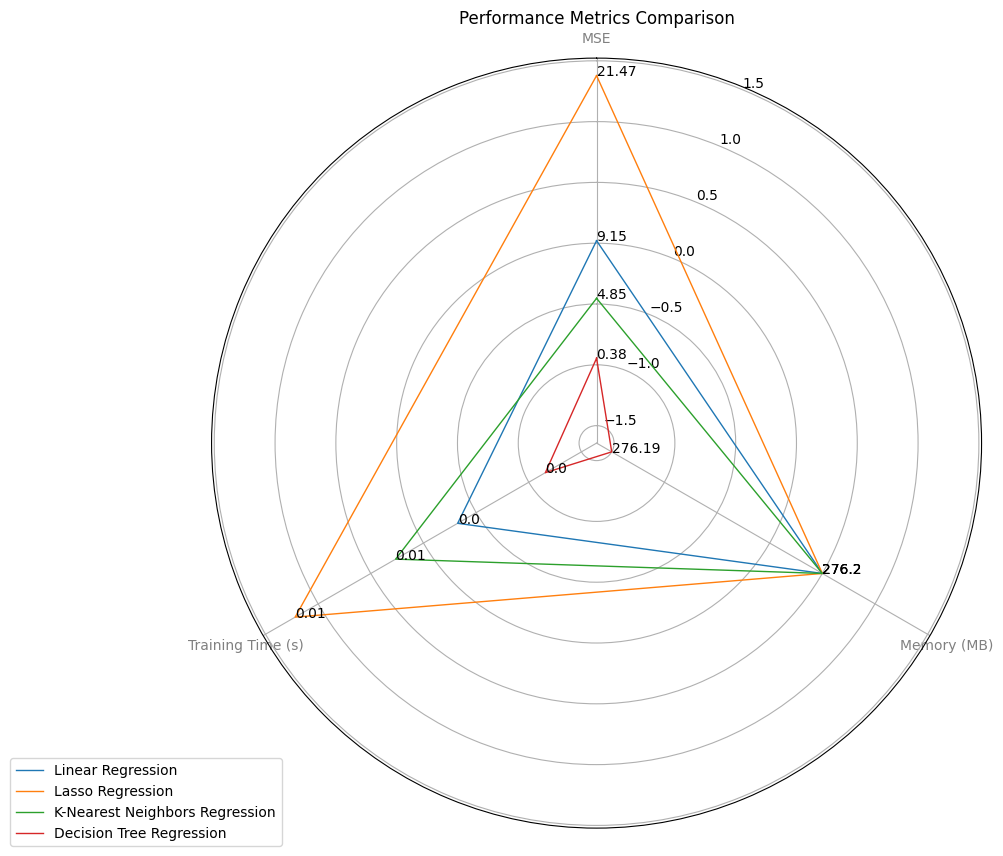

The best model for predicting heating load is: Decision Tree Regression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = {
    'Model': ['Linear Regression', 'Lasso Regression', 'K-Nearest Neighbors Regression', 'Decision Tree Regression'],
    'MSE': [9.151736165801019, 21.465202007989237, 4.85465490909091, 0.3849178961038965],
    'Memory (MB)': [276.19921875, 276.19921875, 276.19921875, 276.1875],
    'Training Time (s)': [0.004968404769897461, 0.0060694217681884766, 0.005388736724853516, 0.004374265670776367]
}

df_results = pd.DataFrame(results)

df_normalized = df_results.drop('Model', axis=1).apply(lambda x: (x - x.mean()) / x.std())

data = df_normalized.values

num_vars = len(df_results.columns) - 1

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

data = np.concatenate((data, data[:,[0]]), axis=1)
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], df_results.columns[1:], color='grey', size=10)

for i in range(len(df_results)):
    ax.plot(angles, data[i], linewidth=1, linestyle='-', label=df_results['Model'][i])

for i in range(len(df_results)):
    for j in range(num_vars):
        if data[i, j] != 0:  # Only annotate non-zero values
            ax.annotate(round(df_results.iloc[i, j+1], 2), (angles[j], data[i, j]))

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Performance Metrics Comparison')

plt.show()

best_model = df_results.loc[df_results['MSE'].idxmin()]['Model']
print("The best model for predicting heating load is:", best_model)
